# Logistics

In [17]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'mental_health_diagnosis_treatment_.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column information to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

(   Patient ID  Age  Gender                  Diagnosis  \
 0           1   43  Female  Major Depressive Disorder   
 1           2   40  Female  Major Depressive Disorder   
 2           3   55  Female  Major Depressive Disorder   
 3           4   34  Female  Major Depressive Disorder   
 4           5   52    Male             Panic Disorder   
 
    Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
 0                       10                  5                     8   
 1                        9                  5                     4   
 2                        6                  3                     4   
 3                        6                  3                     6   
 4                        7                  6                     6   
 
    Physical Activity (hrs/week)        Medication               Therapy Type  \
 0                             5  Mood Stabilizers      Interpersonal Therapy   
 1                             7    Antipsychotics    

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Copy of data for processing
df = data.copy()

# Encode categorical columns
categorical_cols = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert 'Outcome' to binary values: 'Deteriorated' = 1, 'No Change' = 0, ignoring other potential classes for simplicity
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == "Deteriorated" else 0)

# Define features and target variable
X = df.drop(columns=["Patient ID", "Outcome", "Treatment Start Date"])
y = df["Outcome"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix and derived metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
misclassification_rate = (fp + fn) / len(y_test)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)

# Output metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Misclassification Rate": misclassification_rate,
    "True Positive Rate (TPR)": true_positive_rate,
    "False Positive Rate (FPR)": false_positive_rate,
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp
}

# Display the calculated metrics
metrics

{'Accuracy': 0.6,
 'Precision': 0.2727272727272727,
 'Recall': 0.05454545454545454,
 'F1 Score': 0.0909090909090909,
 'Misclassification Rate': 0.4,
 'True Positive Rate (TPR)': 0.05454545454545454,
 'False Positive Rate (FPR)': 0.08421052631578947,
 'True Negatives (TN)': 87,
 'False Positives (FP)': 8,
 'False Negatives (FN)': 52,
 'True Positives (TP)': 3}

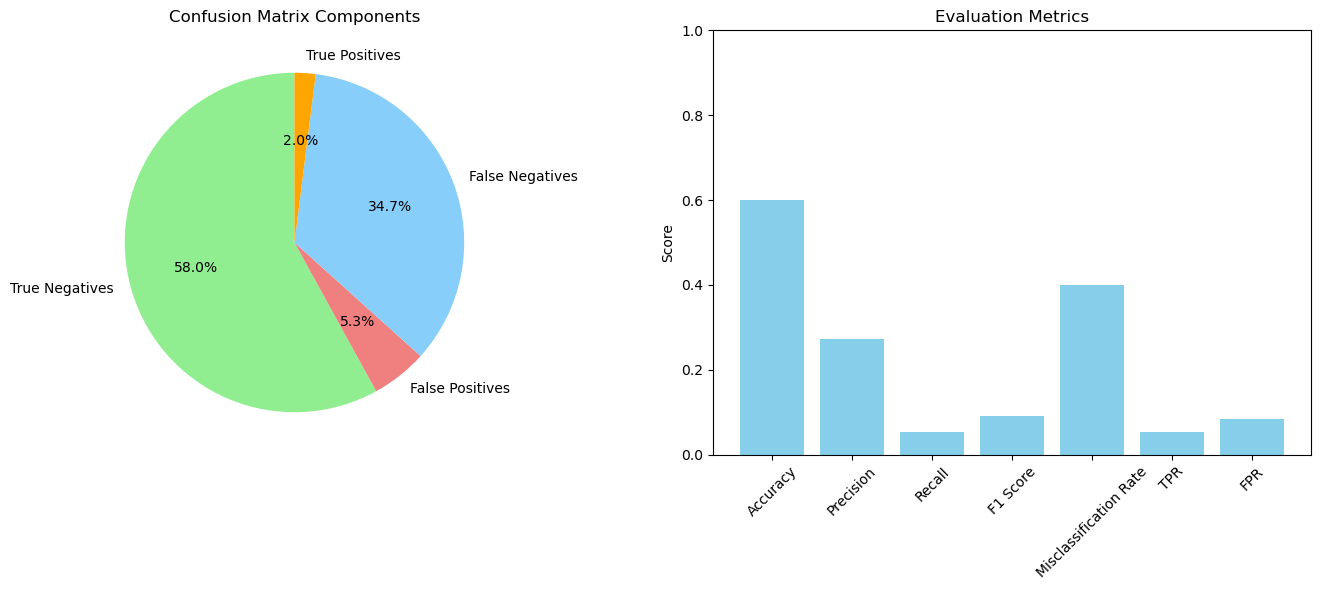

In [19]:
# Visualization: Pie chart for confusion matrix components
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for True Negatives, False Positives, False Negatives, True Positives
confusion_values = [tn, fp, fn, tp]
confusion_labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
ax[0].pie(confusion_values, labels=confusion_labels, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral", "lightskyblue", "orange"])
ax[0].set_title("Confusion Matrix Components")

# Bar graph for the main evaluation metrics
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "TPR", "FPR"]
metric_values = [metrics[label] for label in ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "True Positive Rate (TPR)", "False Positive Rate (FPR)"]]
ax[1].bar(metric_labels, metric_values, color="skyblue")
ax[1].set_ylim(0, 1)
ax[1].set_title("Evaluation Metrics")
ax[1].set_ylabel("Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# decision tree

Metrics:
 {'Accuracy': 0.5933333333333334, 'Precision': 0.45, 'Recall': 0.4909090909090909, 'F1 Score': 0.46956521739130436, 'Misclassification Rate': 0.4066666666666667, 'True Positive Rate (TPR)': 0.4909090909090909, 'False Positive Rate (FPR)': 0.3473684210526316, 'True Negatives (TN)': 62, 'False Positives (FP)': 33, 'False Negatives (FN)': 28, 'True Positives (TP)': 27}


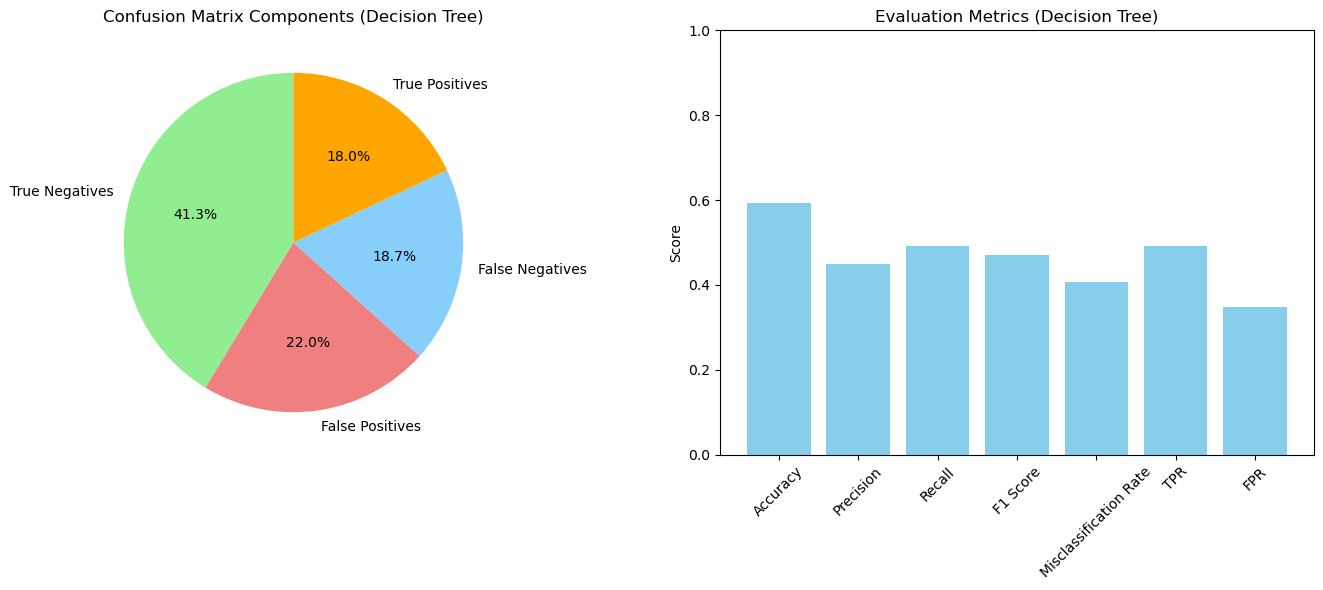

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the datase
data = pd.read_csv('mental_health_diagnosis_treatment_.csv')

# Preprocess the data
df = data.copy()
categorical_cols = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert 'Outcome' to binary: 'Deteriorated' = 1, 'No Change' = 0
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == "Deteriorated" else 0)

# Define features and target
X = df.drop(columns=["Patient ID", "Outcome", "Treatment Start Date"])
y = df["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Confusion matrix and derived metrics
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_pred_dt).ravel()
misclassification_rate_dt = (fp_dt + fn_dt) / len(y_test)
true_positive_rate_dt = tp_dt / (tp_dt + fn_dt)
false_positive_rate_dt = fp_dt / (fp_dt + tn_dt)

# Display metrics
metrics_dt = {
    "Accuracy": accuracy_dt,
    "Precision": precision_dt,
    "Recall": recall_dt,
    "F1 Score": f1_dt,
    "Misclassification Rate": misclassification_rate_dt,
    "True Positive Rate (TPR)": true_positive_rate_dt,
    "False Positive Rate (FPR)": false_positive_rate_dt,
    "True Negatives (TN)": tn_dt,
    "False Positives (FP)": fp_dt,
    "False Negatives (FN)": fn_dt,
    "True Positives (TP)": tp_dt
}

print("Metrics:\n", metrics_dt)

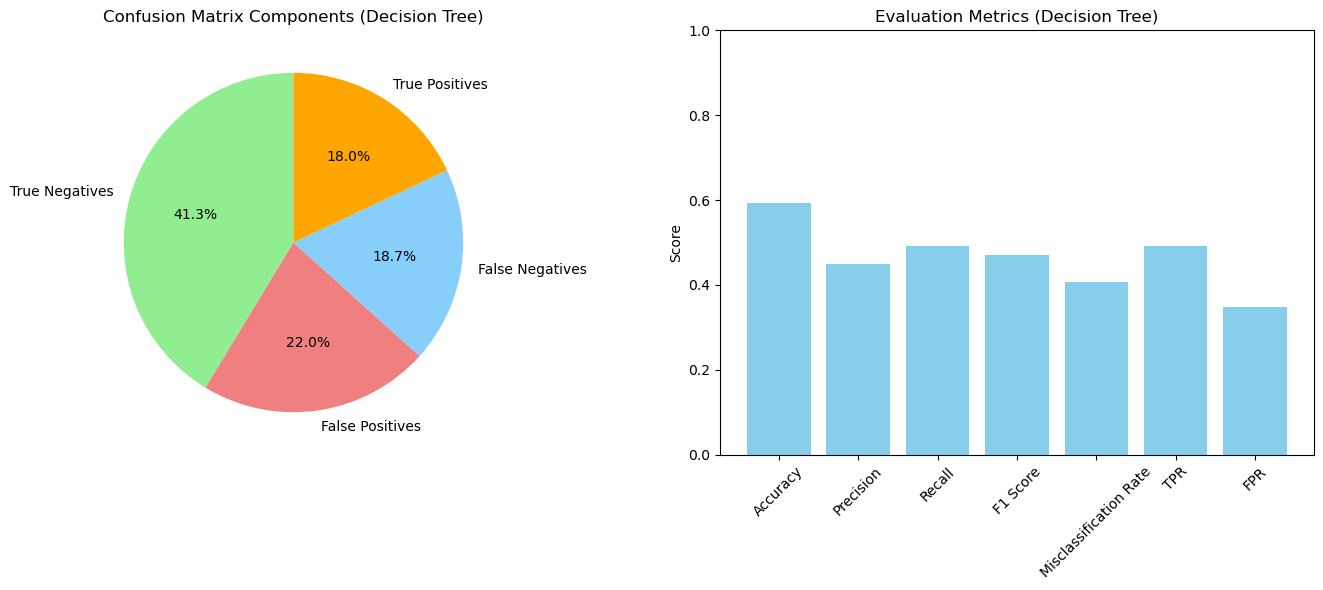

In [23]:
# Visualization: Pie chart for confusion matrix components
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for True Negatives, False Positives, False Negatives, True Positives
confusion_values_dt = [tn_dt, fp_dt, fn_dt, tp_dt]
confusion_labels_dt = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
ax[0].pie(confusion_values_dt, labels=confusion_labels_dt, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral", "lightskyblue", "orange"])
ax[0].set_title("Confusion Matrix Components (Decision Tree)")

# Bar graph for the main evaluation metrics
metric_labels_dt = ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "TPR", "FPR"]
metric_values_dt = [metrics_dt[label] for label in ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "True Positive Rate (TPR)", "False Positive Rate (FPR)"]]
ax[1].bar(metric_labels_dt, metric_values_dt, color="skyblue")
ax[1].set_ylim(0, 1)
ax[1].set_title("Evaluation Metrics (Decision Tree)")
ax[1].set_ylabel("Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# SVM

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mental_health_diagnosis_treatment_.csv')

# Preprocess the data
df = data.copy()
categorical_cols = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert 'Outcome' to binary: 'Deteriorated' = 1, 'No Change' = 0
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == "Deteriorated" else 0)

# Define features and target
X = df.drop(columns=["Patient ID", "Outcome", "Treatment Start Date"])
y = df["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Confusion matrix and derived metrics
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()
misclassification_rate_svm = (fp_svm + fn_svm) / len(y_test)
true_positive_rate_svm = tp_svm / (tp_svm + fn_svm)
false_positive_rate_svm = fp_svm / (fp_svm + tn_svm)

# Display metrics
metrics_svm = {
    "Accuracy": accuracy_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1 Score": f1_svm,
    "Misclassification Rate": misclassification_rate_svm,
    "True Positive Rate (TPR)": true_positive_rate_svm,
    "False Positive Rate (FPR)": false_positive_rate_svm,
    "True Negatives (TN)": tn_svm,
    "False Positives (FP)": fp_svm,
    "False Negatives (FN)": fn_svm,
    "True Positives (TP)": tp_svm
}

print("Metrics:\n", metrics_svm)


Metrics:
 {'Accuracy': 0.6333333333333333, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'Misclassification Rate': 0.36666666666666664, 'True Positive Rate (TPR)': 0.0, 'False Positive Rate (FPR)': 0.0, 'True Negatives (TN)': 95, 'False Positives (FP)': 0, 'False Negatives (FN)': 55, 'True Positives (TP)': 0}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


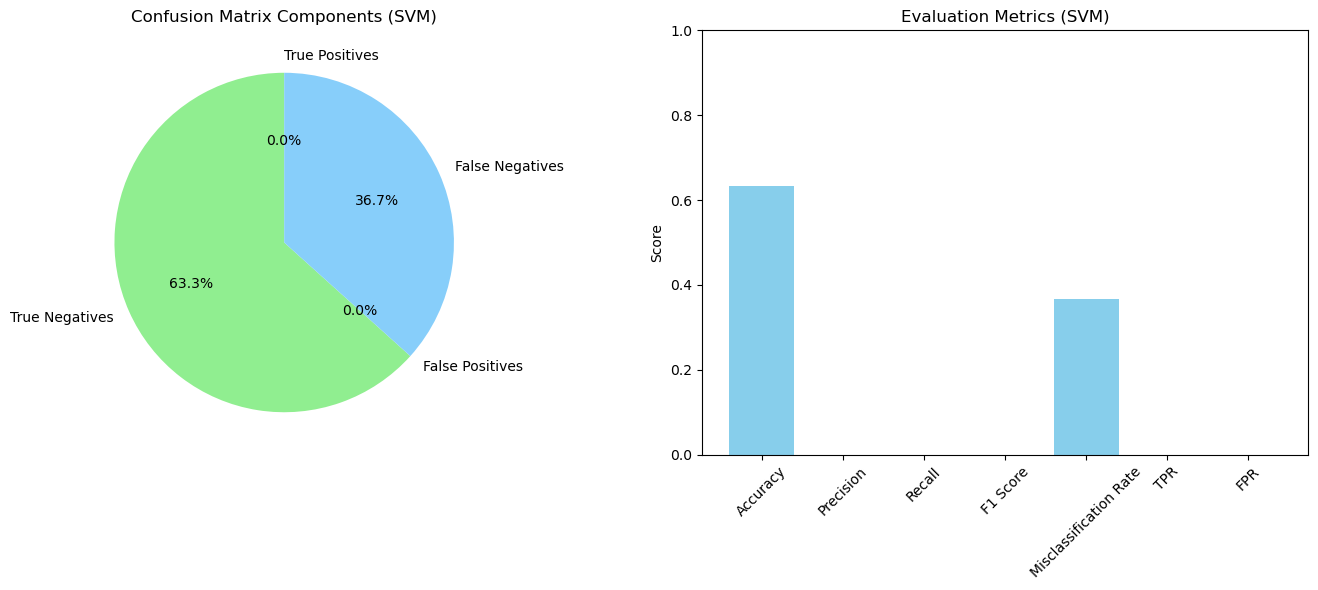

In [25]:

# Visualization: Pie chart for confusion matrix components
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for True Negatives, False Positives, False Negatives, True Positives
confusion_values_svm = [tn_svm, fp_svm, fn_svm, tp_svm]
confusion_labels_svm = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
ax[0].pie(confusion_values_svm, labels=confusion_labels_svm, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral", "lightskyblue", "orange"])
ax[0].set_title("Confusion Matrix Components (SVM)")

# Bar graph for the main evaluation metrics
metric_labels_svm = ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "TPR", "FPR"]
metric_values_svm = [metrics_svm[label] for label in ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "True Positive Rate (TPR)", "False Positive Rate (FPR)"]]
ax[1].bar(metric_labels_svm, metric_values_svm, color="skyblue")
ax[1].set_ylim(0, 1)
ax[1].set_title("Evaluation Metrics (SVM)")
ax[1].set_ylabel("Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Random Forest

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mental_health_diagnosis_treatment_.csv')

# Preprocess the data
df = data.copy()
categorical_cols = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert 'Outcome' to binary: 'Deteriorated' = 1, 'No Change' = 0
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == "Deteriorated" else 0)

# Define features and target
X = df.drop(columns=["Patient ID", "Outcome", "Treatment Start Date"])
y = df["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Confusion matrix and derived metrics
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
misclassification_rate_rf = (fp_rf + fn_rf) / len(y_test)
true_positive_rate_rf = tp_rf / (tp_rf + fn_rf)
false_positive_rate_rf = fp_rf / (fp_rf + tn_rf)

# Display metrics
metrics_rf = {
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1 Score": f1_rf,
    "Misclassification Rate": misclassification_rate_rf,
    "True Positive Rate (TPR)": true_positive_rate_rf,
    "False Positive Rate (FPR)": false_positive_rate_rf,
    "True Negatives (TN)": tn_rf,
    "False Positives (FP)": fp_rf,
    "False Negatives (FN)": fn_rf,
    "True Positives (TP)": tp_rf
}

print("Metrics:\n", metrics_rf)

Metrics:
 {'Accuracy': 0.6266666666666667, 'Precision': 0.45454545454545453, 'Recall': 0.09090909090909091, 'F1 Score': 0.15151515151515152, 'Misclassification Rate': 0.37333333333333335, 'True Positive Rate (TPR)': 0.09090909090909091, 'False Positive Rate (FPR)': 0.06315789473684211, 'True Negatives (TN)': 89, 'False Positives (FP)': 6, 'False Negatives (FN)': 50, 'True Positives (TP)': 5}


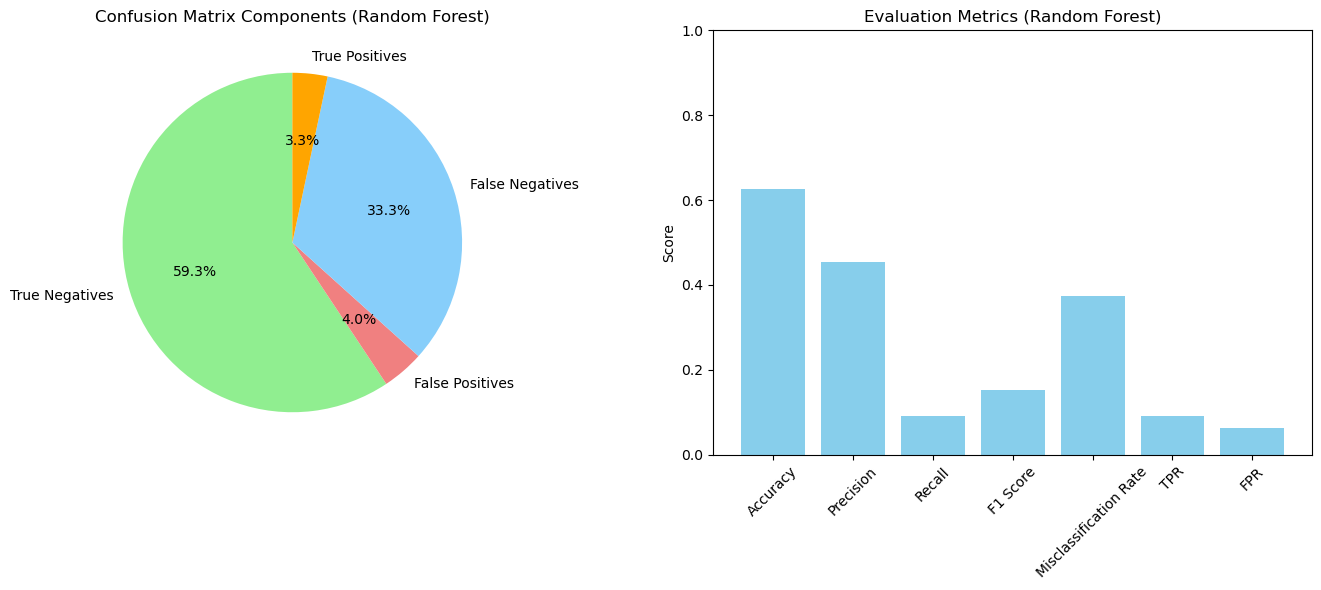

In [29]:
# Visualization: Pie chart for confusion matrix components
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for True Negatives, False Positives, False Negatives, True Positives
confusion_values_rf = [tn_rf, fp_rf, fn_rf, tp_rf]
confusion_labels_rf = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
ax[0].pie(confusion_values_rf, labels=confusion_labels_rf, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral", "lightskyblue", "orange"])
ax[0].set_title("Confusion Matrix Components (Random Forest)")

# Bar graph for the main evaluation metrics
metric_labels_rf = ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "TPR", "FPR"]
metric_values_rf = [metrics_rf[label] for label in ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "True Positive Rate (TPR)", "False Positive Rate (FPR)"]]
ax[1].bar(metric_labels_rf, metric_values_rf, color="skyblue")
ax[1].set_ylim(0, 1)
ax[1].set_title("Evaluation Metrics (Random Forest)")
ax[1].set_ylabel("Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Naive Bayes

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mental_health_diagnosis_treatment_.csv')

# Preprocess the data
df = data.copy()
categorical_cols = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert 'Outcome' to binary: 'Deteriorated' = 1, 'No Change' = 0
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == "Deteriorated" else 0)

# Define features and target
X = df.drop(columns=["Patient ID", "Outcome", "Treatment Start Date"])
y = df["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Confusion matrix and derived metrics
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, y_pred_nb).ravel()
misclassification_rate_nb = (fp_nb + fn_nb) / len(y_test)
true_positive_rate_nb = tp_nb / (tp_nb + fn_nb)
false_positive_rate_nb = fp_nb / (fp_nb + tn_nb)

# Display metrics
metrics_nb = {
    "Accuracy": accuracy_nb,
    "Precision": precision_nb,
    "Recall": recall_nb,
    "F1 Score": f1_nb,
    "Misclassification Rate": misclassification_rate_nb,
    "True Positive Rate (TPR)": true_positive_rate_nb,
    "False Positive Rate (FPR)": false_positive_rate_nb,
    "True Negatives (TN)": tn_nb,
    "False Positives (FP)": fp_nb,
    "False Negatives (FN)": fn_nb,
    "True Positives (TP)": tp_nb
}

print("Metrics:\n", metrics_nb)

Metrics:
 {'Accuracy': 0.62, 'Precision': 0.4, 'Recall': 0.07272727272727272, 'F1 Score': 0.12307692307692307, 'Misclassification Rate': 0.38, 'True Positive Rate (TPR)': 0.07272727272727272, 'False Positive Rate (FPR)': 0.06315789473684211, 'True Negatives (TN)': 89, 'False Positives (FP)': 6, 'False Negatives (FN)': 51, 'True Positives (TP)': 4}


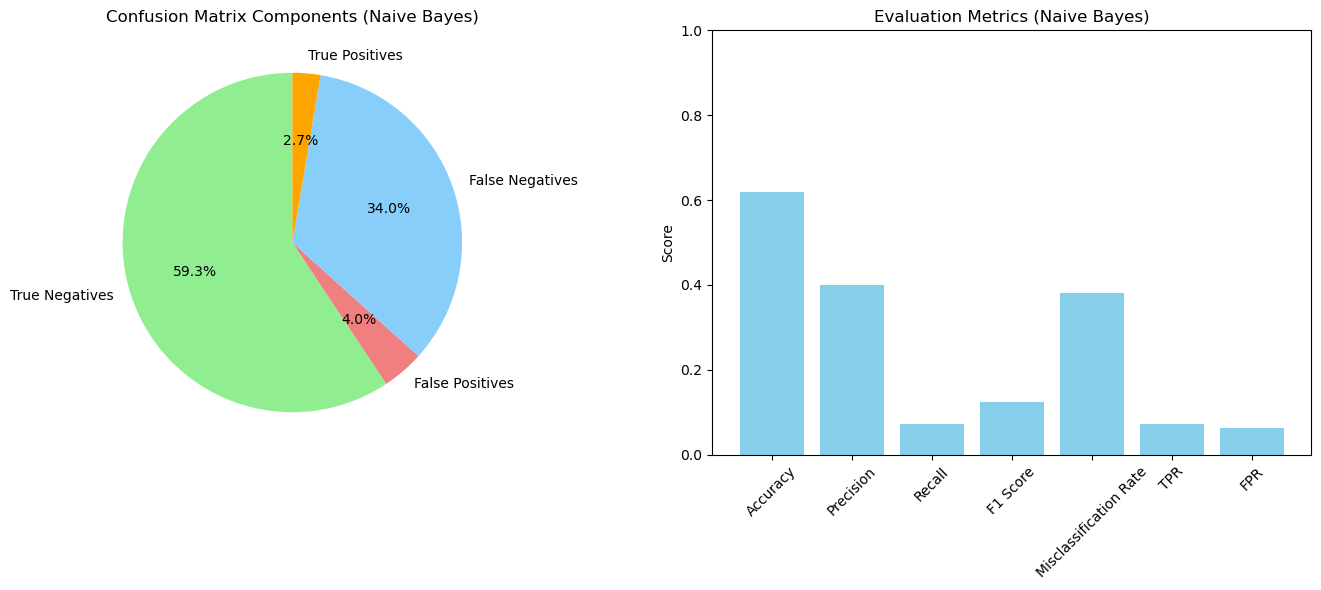

In [33]:

# Visualization: Pie chart for confusion matrix components
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for True Negatives, False Positives, False Negatives, True Positives
confusion_values_nb = [tn_nb, fp_nb, fn_nb, tp_nb]
confusion_labels_nb = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
ax[0].pie(confusion_values_nb, labels=confusion_labels_nb, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral", "lightskyblue", "orange"])
ax[0].set_title("Confusion Matrix Components (Naive Bayes)")

# Bar graph for the main evaluation metrics
metric_labels_nb = ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "TPR", "FPR"]
metric_values_nb = [metrics_nb[label] for label in ["Accuracy", "Precision", "Recall", "F1 Score", "Misclassification Rate", "True Positive Rate (TPR)", "False Positive Rate (FPR)"]]
ax[1].bar(metric_labels_nb, metric_values_nb, color="skyblue")
ax[1].set_ylim(0, 1)
ax[1].set_title("Evaluation Metrics (Naive Bayes)")
ax[1].set_ylabel("Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()